In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from calendar import day_abbr
from scipy import stats
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
import seaborn as sns
import json
from pandas.io.json import json_normalize
from wordcloud import WordCloud, STOPWORDS

In [2]:
response = pd.read_csv('/Users/wangmengyuan/Desktop/Responses.csv',encoding="ISO-8859-1",low_memory=False)
response.columns
response.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Male                                                 13610
Female                                                2778
A different identity                                   159
Non-binary, genderqueer, or gender non-conforming       74
Name: GenderSelect, dtype: int64


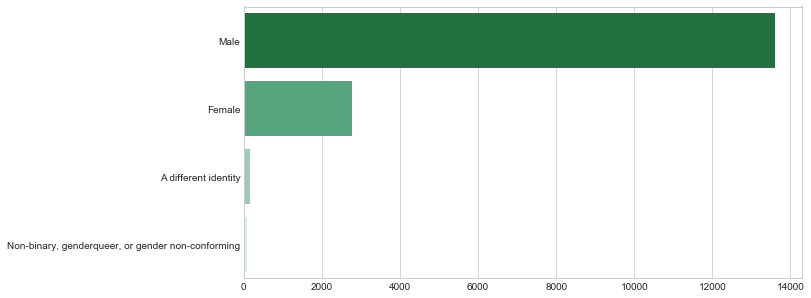

In [4]:
plt.figure(figsize=(10,5))
genders = response['GenderSelect'].value_counts()
genders.columns = ['Gender', 'Response']
print(genders)
sns.set_style("whitegrid")
sns.barplot(y=genders.index, x=genders.values, palette="BuGn_r")

In [5]:
age = response[(response['Age']>10) & (response['Age']<=70)]
age['Age'].describe()

count    16306.000000
mean        32.242242
std         10.006551
min         11.000000
25%         25.000000
50%         30.000000
75%         37.000000
max         70.000000
Name: Age, dtype: float64

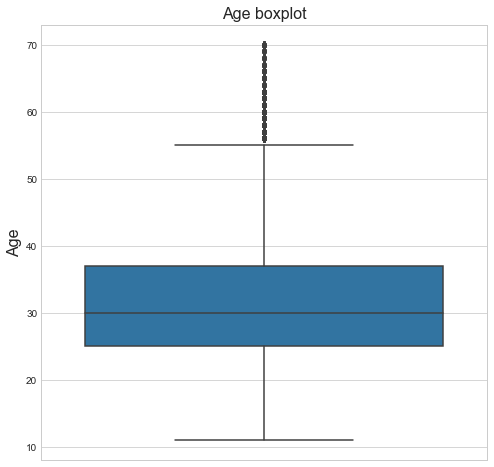

In [43]:
plt.figure(figsize=(8,8))
sns.boxplot( y=age['Age'],data=age)
plt.title("Age boxplot", fontsize=16)
plt.ylabel("Age", fontsize=16)
plt.show();

In [15]:
country = pd.DataFrame(response['Country'].value_counts())
country['country'] = country.index
country.columns = ['frequency','country']
country = country.reset_index().drop('index', axis=1)
country

,frequency,country
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [28]:
data = [ dict(
        type = 'choropleth',
        locations = country['country'],
        locationmode = 'country names',
        z = country['frequency'],
        text = country['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(56, 142, 60)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Numbers of Respondents'),
      ) ]

layout = dict(
    title = 'Survey Respondents by Nationality',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='survey-world-map')

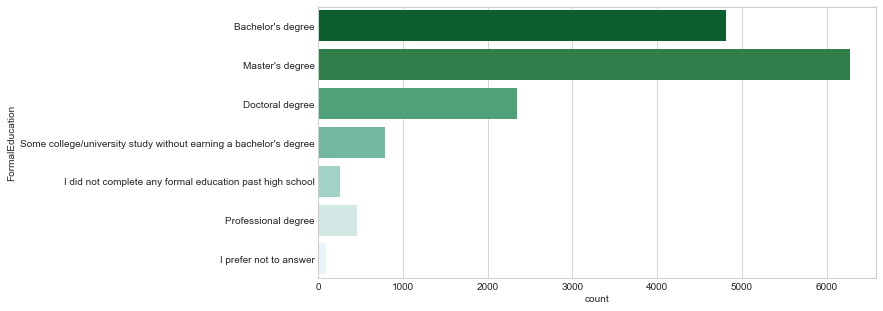

In [44]:
plt.figure(figsize=(10,5))
sns.countplot(y='FormalEducation', data=response, palette="BuGn_r")

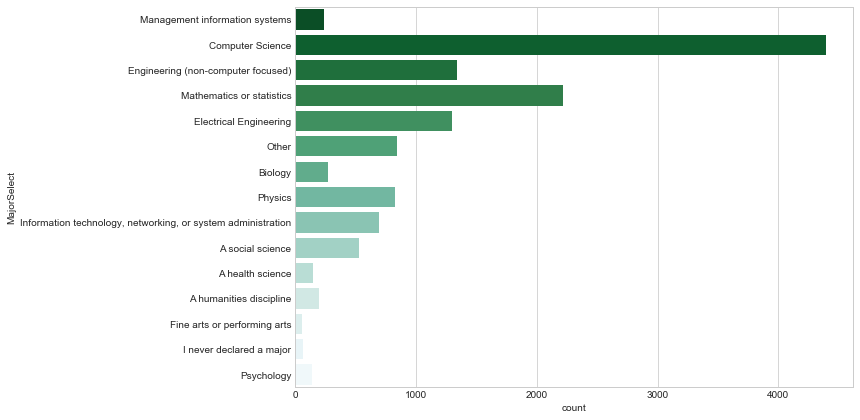

In [47]:
plt.figure(figsize=(10,7))
sns.countplot(y='MajorSelect', data=response, palette="BuGn_r")

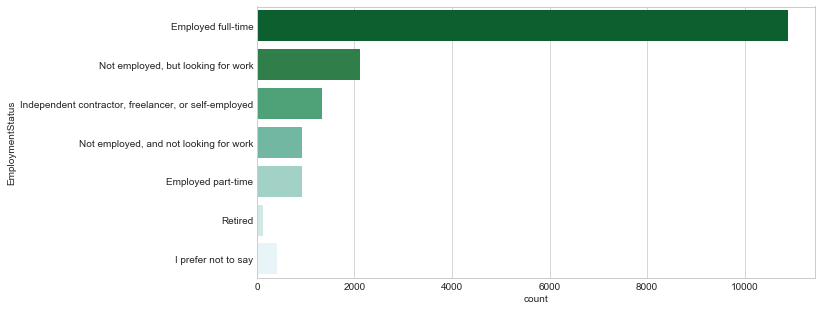

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(y='EmploymentStatus', data=response, palette="BuGn_r")

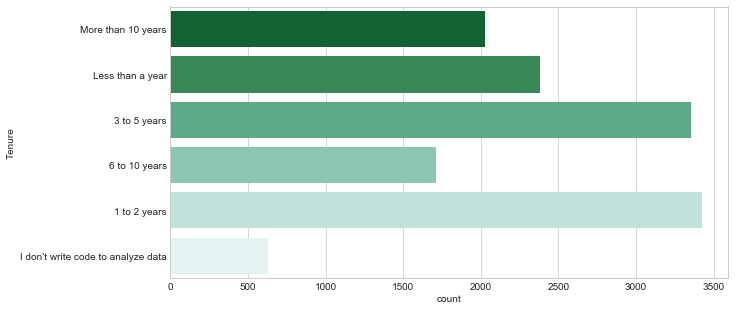

In [52]:
plt.figure(figsize=(10,5))
sns.countplot(y='Tenure', data=response, palette="BuGn_r")

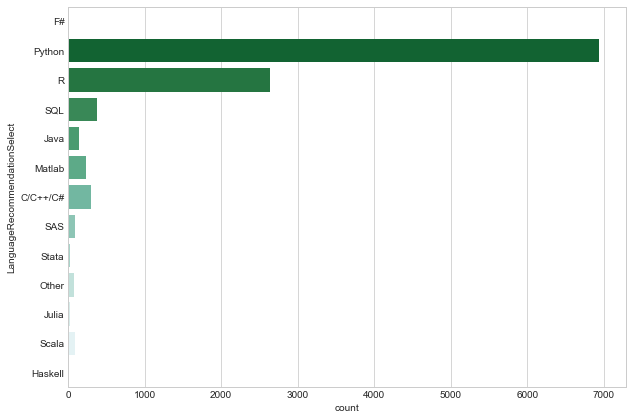

In [54]:
plt.figure(figsize=(10,7))
sns.countplot(y='LanguageRecommendationSelect', data=response, palette="BuGn_r")

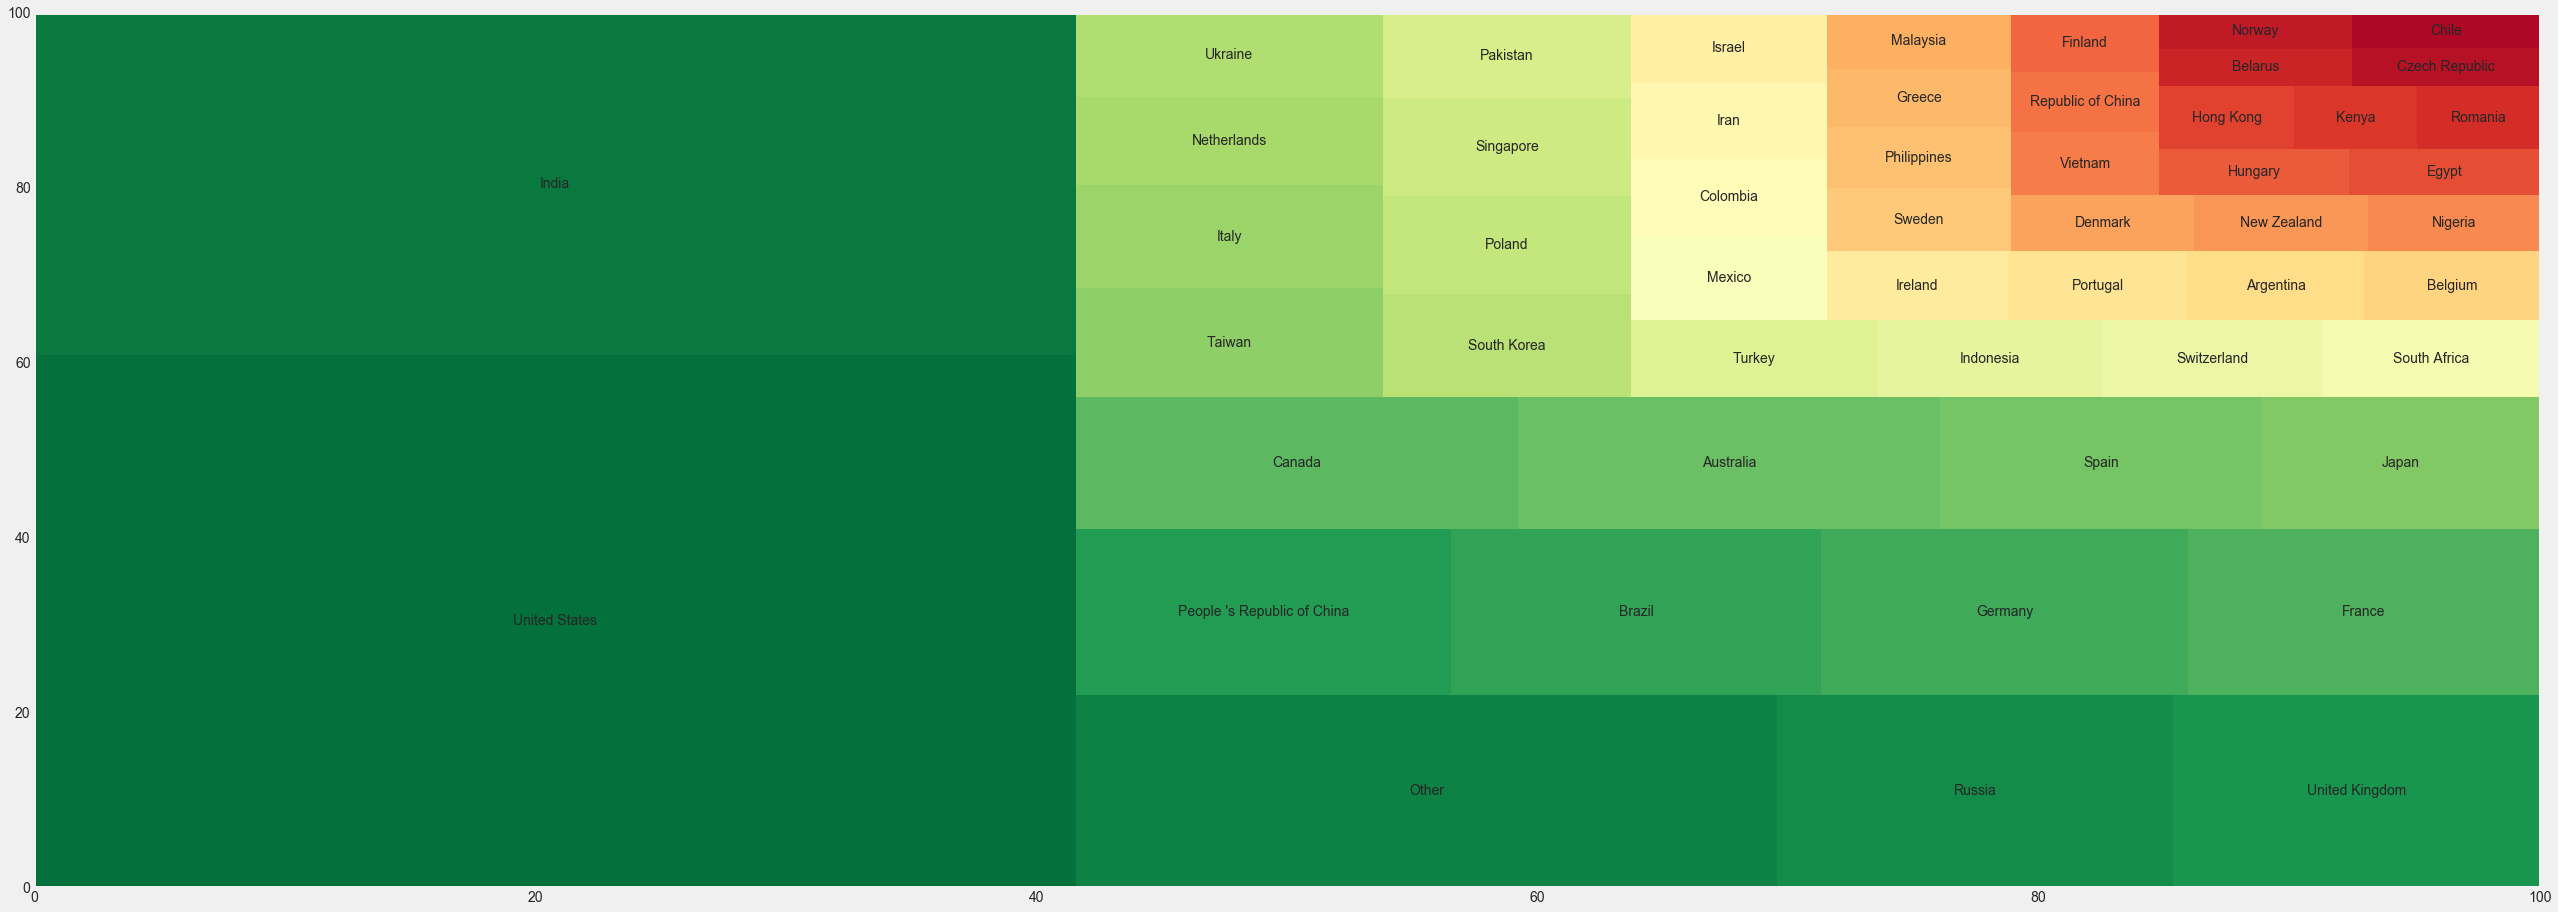

In [58]:
import squarify
plt.style.use('fivethirtyeight')
tree=response['Country'].value_counts().to_frame()
squarify.plot(sizes=tree['Country'].values,label=tree.index,color=sns.color_palette('RdYlGn_r',52))
plt.rcParams.update({'font.size':20})
fig=plt.gcf()
fig.set_size_inches(40,15)
plt.show()

In [7]:
response['CompensationAmount']=response['CompensationAmount'].str.replace(',','')
response['CompensationAmount']=response['CompensationAmount'].str.replace('-','')
rates=pd.read_csv('/Users/wangmengyuan/Desktop/Rates.csv')
rates.drop('Unnamed: 0',axis=1,inplace=True)
salary=response[['CompensationAmount','CompensationCurrency','GenderSelect','Country',
                 'CurrentJobTitleSelect']].dropna()
salary=salary.merge(rates,left_on='CompensationCurrency',right_on='originCountry',how='left')
salary['Salary']=pd.to_numeric(salary['CompensationAmount'])*salary['exchangeRate']
print('Maximum Salary is USD $',salary['Salary'].dropna().astype(int).max())
print('Minimum Salary is USD $',salary['Salary'].dropna().astype(int).min())
print('Median Salary is USD $',salary['Salary'].dropna().astype(int).median())

Maximum Salary is USD $ 28297400000
Minimum Salary is USD $ 0
Median Salary is USD $ 53812.0


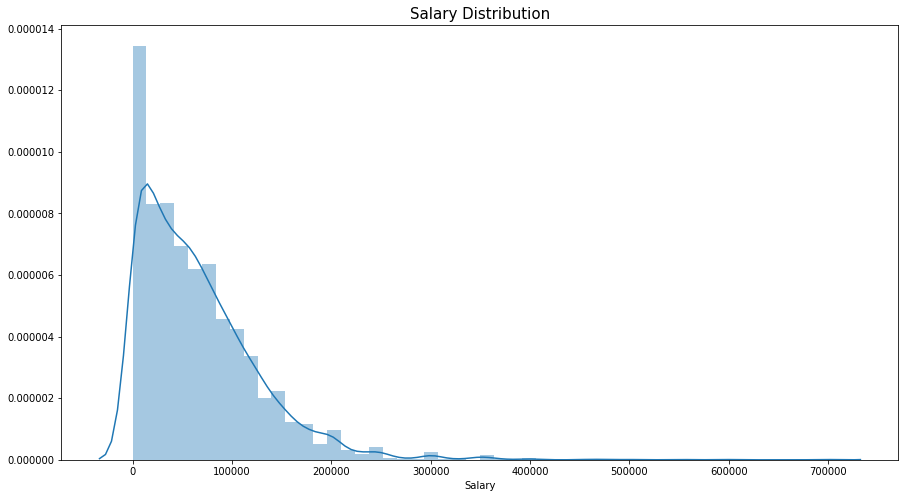

In [4]:
plt.subplots(figsize=(15,8))
salary=salary[salary['Salary']<1000000]
sns.distplot(salary['Salary'])
plt.title('Salary Distribution',size=15)
plt.show()

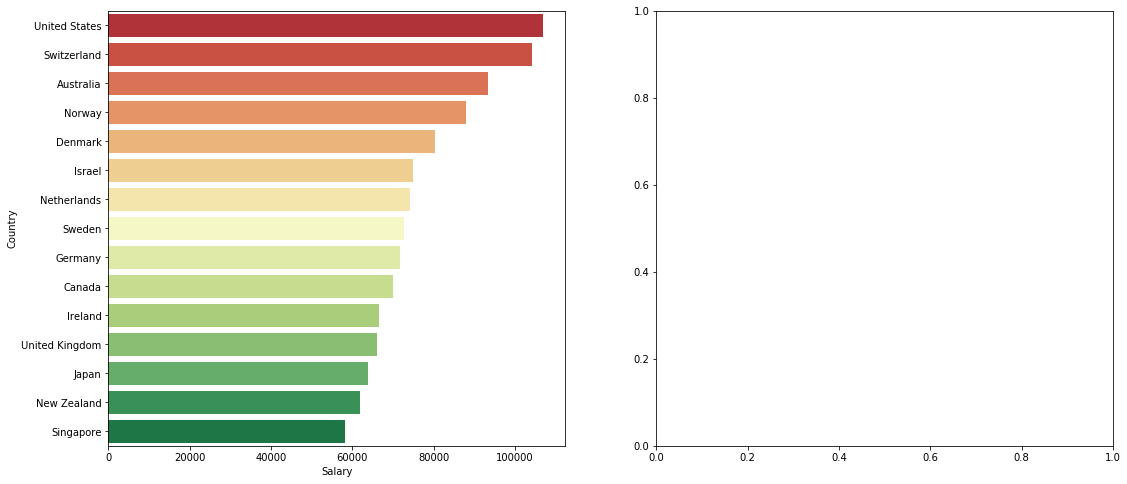

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sal_coun=salary.groupby('Country')['Salary'].median().sort_values(ascending=False)[:15].to_frame()
sns.barplot('Salary',sal_coun.index,data=sal_coun,palette='RdYlGn',ax=ax[0])
ax[0].axvline(salary['Salary'].median(),linestyle='dashed')
ax[0].set_title('Highest Salary Paying Countries')
ax[0].set_xlabel('')
max_coun=salary.groupby('Country')['Salary'].median().to_frame()
max_coun=max_coun[max_coun.index.isin(resp_coun.index)]
max_coun.sort_values(by='Salary',ascending=True).plot.barh(width=0.8,ax=ax[1],color=sns.color_palette('RdYlGn'))
ax[1].axvline(salary['Salary'].median(),linestyle='dashed')
ax[1].set_title('Compensation of Top 15 Respondent Countries')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
plt.subplots_adjust(wspace=0.8)
plt.show()